# Data Overlap Analysis: Training vs Testing

This notebook analyzes the overlap between training and testing data for:
- Users (customer_id)
- Cuisines (via vendor_id -> primary_cuisine)

In [1]:
import sys
import pandas as pd
from pathlib import Path

# Add project root to path for imports
project_root = Path.cwd().parent.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from agentic_recommender.data.enriched_loader import DataConfig, EnrichedDataLoader

In [2]:
# !pip install matplotlib_venn

## 1. Data Configuration

In [3]:
# Data paths
DATA_DIR = Path("/home/zhenkai/Downloads/data_se/data_se")

# File names
ORDERS_TRAIN = "orders_se_train.txt"
ORDERS_TEST = "orders_se_test.txt"
VENDORS_FILE = "vendors_se.txt"
PRODUCTS_FILE = "products_se.txt"

print(f"Data directory: {DATA_DIR}")
print(f"Files exist:")
print(f"  - Train orders: {(DATA_DIR / ORDERS_TRAIN).exists()}")
print(f"  - Test orders: {(DATA_DIR / ORDERS_TEST).exists()}")
print(f"  - Vendors: {(DATA_DIR / VENDORS_FILE).exists()}")
print(f"  - Products: {(DATA_DIR / PRODUCTS_FILE).exists()}")

Data directory: /home/zhenkai/Downloads/data_se/data_se
Files exist:
  - Train orders: True
  - Test orders: True
  - Vendors: True
  - Products: True


## 2. Load Data Using Project Utils

In [4]:
def load_merged_data(data_dir: Path, orders_file: str) -> pd.DataFrame:
    """
    Load and merge data using the project's EnrichedDataLoader.
    
    This reuses the same logic from workflow_runner.py -> enriched_loader.py
    """
    config = DataConfig(
        data_dir=data_dir,
        orders_file=orders_file,
        vendors_file=VENDORS_FILE,
        products_file=PRODUCTS_FILE
    )
    loader = EnrichedDataLoader(config)
    return loader.load_merged()

In [5]:
# Load training data
print("Loading training data...")
train_df = load_merged_data(DATA_DIR, ORDERS_TRAIN)
print(f"Training data shape: {train_df.shape}")
print(f"Columns: {list(train_df.columns)}")

Loading training data...
Training data shape: (617196, 17)
Columns: ['Unnamed: 0', 'customer_id', 'user_geohash', 'order_id', 'vendor_id', 'product_id', 'day_of_week', 'order_time', 'order_day', 'hour', 'day_num', 'day_name', 'cuisine', 'vendor_geohash', 'chain_id', 'product_name', 'unit_price']


In [6]:
# Load testing data
print("Loading testing data...")
test_df = load_merged_data(DATA_DIR, ORDERS_TEST)
print(f"Testing data shape: {test_df.shape}")
print(f"Columns: {list(test_df.columns)}")

Loading testing data...
Testing data shape: (139542, 17)
Columns: ['Unnamed: 0', 'customer_id', 'user_geohash', 'order_id', 'vendor_id', 'product_id', 'day_of_week', 'order_time', 'order_day', 'hour', 'day_num', 'day_name', 'cuisine', 'vendor_geohash', 'chain_id', 'product_name', 'unit_price']


In [7]:
# Display sample data
print("\nTraining data sample:")
train_df.head()


Training data sample:


,Unnamed: 0,customer_id,user_geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day,hour,day_num,day_name,cuisine,vendor_geohash,chain_id,product_name,unit_price
0,0,90a4e98622,u6sc4,0,e1f3e4a4,9971ae2cd1ba,3,16:00:16,11 days,16,11,Thu,italienskt,u6sc5,3ed908e5,Coca-Cola original taste 33 cl,0.152
1,1,90a4e98622,u6sc4,0,e1f3e4a4,00734c4b351f,3,16:00:16,11 days,16,11,Thu,italienskt,u6sc5,3ed908e5,Parma,0.780
2,2,90a4e98622,u6sc4,1,5d1b1300,9a2b00f39640,1,16:34:04,51 days,16,51,Tue,asiatiskt,u6sc6,f782a3fc,Pad Thai,0.640
3,4,90a4e98622,u6sc4,3,5d1b1300,9a2b00f39640,3,16:23:14,53 days,16,53,Thu,asiatiskt,u6sc6,f782a3fc,Pad Thai,0.640
4,5,90a4e98622,u6sc4,4,4790e97d,f6b685cff997,2,15:34:13,66 days,15,66,Wed,sushi,u6sc5,,Coca-Cola original taste 33 cl,0.080


In [8]:
print("Testing data sample:")
test_df.head()

Testing data sample:


,Unnamed: 0,customer_id,user_geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day,hour,day_num,day_name,cuisine,vendor_geohash,chain_id,product_name,unit_price
0,3,90a4e98622,u6sc4,2,5d1b1300,9a2b00f39640,6,14:39:12,84 days,14,84,Sun,asiatiskt,u6sc6,f782a3fc,Pad Thai,0.640
1,17,1c2b4598db,u6sc9,11,262f6435,ae0b5cbf8dd1,6,17:10:04,84 days,17,84,Sun,pizza,u6sc9,,Standard,0.496
2,18,1c2b4598db,u6sc9,11,262f6435,674d25744130,6,17:10:04,84 days,17,84,Sun,pizza,u6sc9,,Pizzasallad,0.040
3,19,1c2b4598db,u6sc9,11,262f6435,28da0a2a7fa3,6,17:10:04,84 days,17,84,Sun,pizza,u6sc9,,Vitlökssås,0.060
4,23,894db839be,u6sc1,13,64a3af0f,de662e62862f,6,13:43:12,77 days,13,77,Sun,pizza,u6sc1,,Kebabrulle,0.500


## 3. User (Customer) Overlap Analysis

In [9]:
# Extract unique users from each dataset
train_users = set(train_df['customer_id'].unique())
test_users = set(test_df['customer_id'].unique())

# Calculate overlap
common_users = train_users & test_users
train_only_users = train_users - test_users
test_only_users = test_users - train_users

print("=" * 60)
print("USER OVERLAP ANALYSIS")
print("=" * 60)
print(f"\nTotal unique users in training:  {len(train_users):,}")
print(f"Total unique users in testing:   {len(test_users):,}")
print(f"\nUsers in BOTH train and test:    {len(common_users):,}")
print(f"Users ONLY in training:          {len(train_only_users):,}")
print(f"Users ONLY in testing:           {len(test_only_users):,}")
print(f"\nOverlap percentage (test users in train): {len(common_users) / len(test_users) * 100:.2f}%")
print(f"Overlap percentage (train users in test): {len(common_users) / len(train_users) * 100:.2f}%")

USER OVERLAP ANALYSIS

Total unique users in training:  109,544
Total unique users in testing:   46,264

Users in BOTH train and test:    32,877
Users ONLY in training:          76,667
Users ONLY in testing:           13,387

Overlap percentage (test users in train): 71.06%
Overlap percentage (train users in test): 30.01%


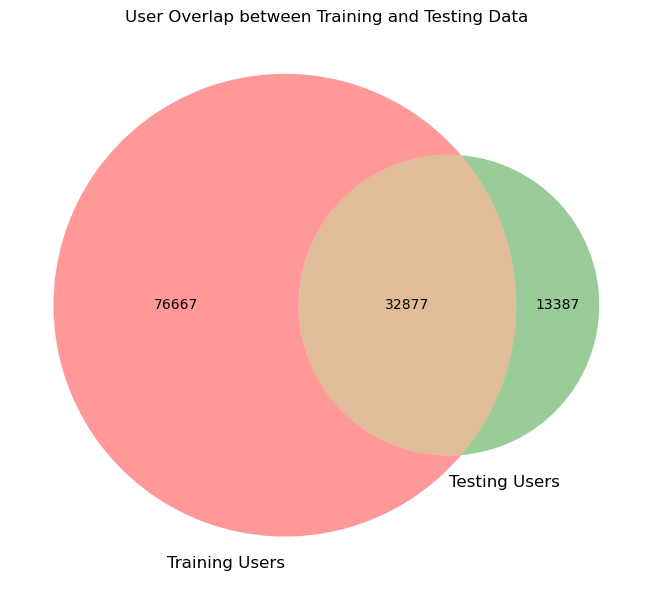

In [10]:
# Visualize user overlap
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

fig, ax = plt.subplots(figsize=(10, 6))
venn2(
    subsets=(len(train_only_users), len(test_only_users), len(common_users)),
    set_labels=('Training Users', 'Testing Users'),
    ax=ax
)
plt.title('User Overlap between Training and Testing Data')
plt.tight_layout()
plt.show()

## 4. Cuisine Overlap Analysis

In [11]:
# Extract unique cuisines from each dataset
train_cuisines = set(train_df['cuisine'].unique())
test_cuisines = set(test_df['cuisine'].unique())

# Calculate overlap
common_cuisines = train_cuisines & test_cuisines
train_only_cuisines = train_cuisines - test_cuisines
test_only_cuisines = test_cuisines - train_cuisines

print("=" * 60)
print("CUISINE OVERLAP ANALYSIS")
print("=" * 60)
print(f"\nTotal unique cuisines in training: {len(train_cuisines)}")
print(f"Total unique cuisines in testing:  {len(test_cuisines)}")
print(f"\nCuisines in BOTH train and test:   {len(common_cuisines)}")
print(f"Cuisines ONLY in training:         {len(train_only_cuisines)}")
print(f"Cuisines ONLY in testing:          {len(test_only_cuisines)}")
print(f"\nOverlap percentage (test cuisines in train): {len(common_cuisines) / len(test_cuisines) * 100:.2f}%")
print(f"Overlap percentage (train cuisines in test): {len(common_cuisines) / len(train_cuisines) * 100:.2f}%")

CUISINE OVERLAP ANALYSIS

Total unique cuisines in training: 39
Total unique cuisines in testing:  40

Cuisines in BOTH train and test:   39
Cuisines ONLY in training:         0
Cuisines ONLY in testing:          1

Overlap percentage (test cuisines in train): 97.50%
Overlap percentage (train cuisines in test): 100.00%


In [12]:
# List cuisines
print("\nCuisines in BOTH train and test:")
for c in sorted(common_cuisines):
    print(f"  - {c}")

if train_only_cuisines:
    print("\nCuisines ONLY in training:")
    for c in sorted(train_only_cuisines):
        print(f"  - {c}")

if test_only_cuisines:
    print("\nCuisines ONLY in testing:")
    for c in sorted(test_only_cuisines):
        print(f"  - {c}")


Cuisines in BOTH train and test:
  - afrikanskt
  - amerikanskt
  - asiatiskt
  - bageri
  - bangladesiskt
  - brasilianskt
  - burgare
  - franskt
  - gatukök
  - glass
  - grekiskt
  - hälsosamt
  - indiskt
  - internationell
  - italienskt
  - japanskt
  - kafé
  - kebab
  - kinesiskt
  - korean
  - kyckling
  - kött
  - libanesiskt
  - medelhav
  - mellanöstern
  - mexikanskt
  - peruanskt
  - pizza
  - sallad
  - smörgåsar
  - spanskt
  - sushi
  - svenskt
  - sydamerikanskt
  - thai
  - turkiskt
  - unknown
  - vegetariskt
  - vietnam-esiskt

Cuisines ONLY in testing:
  - falafel


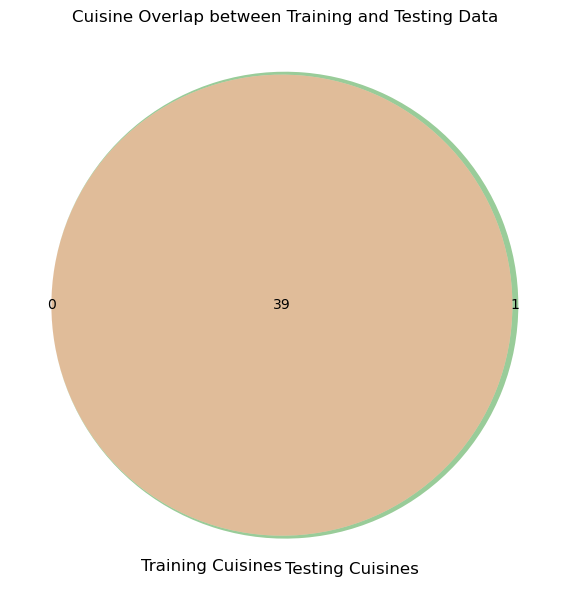

In [13]:
# Visualize cuisine overlap
fig, ax = plt.subplots(figsize=(10, 6))
venn2(
    subsets=(len(train_only_cuisines), len(test_only_cuisines), len(common_cuisines)),
    set_labels=('Training Cuisines', 'Testing Cuisines'),
    ax=ax
)
plt.title('Cuisine Overlap between Training and Testing Data')
plt.tight_layout()
plt.show()

## 5. Detailed Statistics

In [14]:
# Cuisine distribution comparison
train_cuisine_counts = train_df.groupby('cuisine')['order_id'].nunique().sort_values(ascending=False)
test_cuisine_counts = test_df.groupby('cuisine')['order_id'].nunique().sort_values(ascending=False)

# Combine into a comparison dataframe
cuisine_comparison = pd.DataFrame({
    'train_orders': train_cuisine_counts,
    'test_orders': test_cuisine_counts
}).fillna(0).astype(int)
cuisine_comparison['total'] = cuisine_comparison['train_orders'] + cuisine_comparison['test_orders']
cuisine_comparison = cuisine_comparison.sort_values('total', ascending=False)

print("Top 20 Cuisines by Total Orders:")
cuisine_comparison.head(20)

Top 20 Cuisines by Total Orders:


,train_orders,test_orders,total
cuisine,,,
pizza,71835,15078,86913
burgare,62198,11353,73551
asiatiskt,32796,7928,40724
sushi,19187,5592,24779
indiskt,19013,4590,23603
thai,17363,3781,21144
kafé,14898,3502,18400
italienskt,12059,3054,15113
japanskt,7611,2083,9694


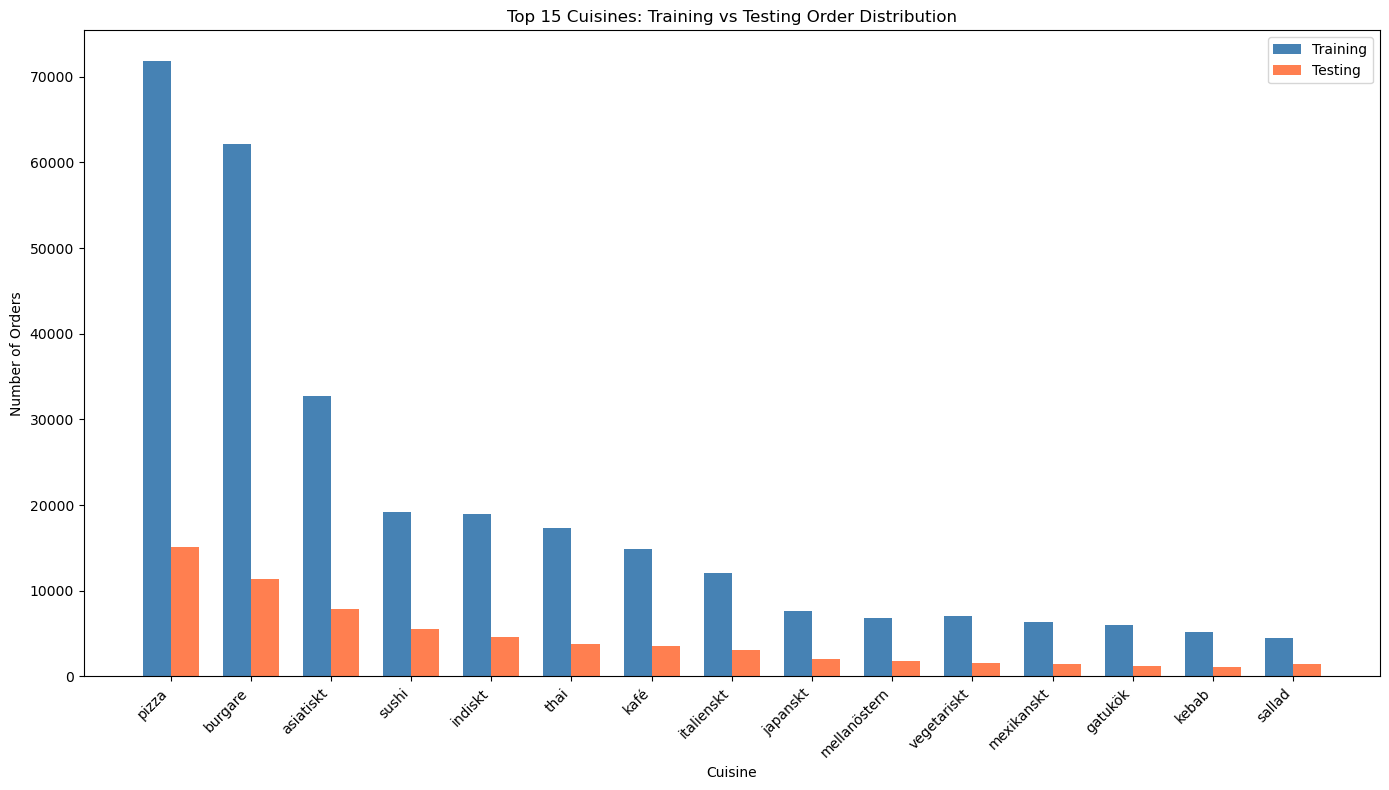

In [15]:
# Plot cuisine distribution
fig, ax = plt.subplots(figsize=(14, 8))

top_cuisines = cuisine_comparison.head(15)
x = range(len(top_cuisines))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], top_cuisines['train_orders'], width, label='Training', color='steelblue')
bars2 = ax.bar([i + width/2 for i in x], top_cuisines['test_orders'], width, label='Testing', color='coral')

ax.set_xlabel('Cuisine')
ax.set_ylabel('Number of Orders')
ax.set_title('Top 15 Cuisines: Training vs Testing Order Distribution')
ax.set_xticks(x)
ax.set_xticklabels(top_cuisines.index, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [16]:
# User activity in training vs testing
train_user_orders = train_df.groupby('customer_id')['order_id'].nunique()
test_user_orders = test_df.groupby('customer_id')['order_id'].nunique()

# For common users, compare activity
common_user_stats = pd.DataFrame({
    'train_orders': train_user_orders.reindex(common_users),
    'test_orders': test_user_orders.reindex(common_users)
}).dropna()

print("\nOrder Activity for Common Users:")
print(f"  Mean train orders: {common_user_stats['train_orders'].mean():.2f}")
print(f"  Mean test orders:  {common_user_stats['test_orders'].mean():.2f}")
print(f"  Median train orders: {common_user_stats['train_orders'].median():.0f}")
print(f"  Median test orders:  {common_user_stats['test_orders'].median():.0f}")


Order Activity for Common Users:
  Mean train orders: 5.23
  Mean test orders:  1.78
  Median train orders: 3
  Median test orders:  1


In [17]:
# Vendor overlap analysis
train_vendors = set(train_df['vendor_id'].unique())
test_vendors = set(test_df['vendor_id'].unique())

common_vendors = train_vendors & test_vendors
train_only_vendors = train_vendors - test_vendors
test_only_vendors = test_vendors - train_vendors

print("=" * 60)
print("VENDOR OVERLAP ANALYSIS")
print("=" * 60)
print(f"\nTotal unique vendors in training: {len(train_vendors):,}")
print(f"Total unique vendors in testing:  {len(test_vendors):,}")
print(f"\nVendors in BOTH train and test:   {len(common_vendors):,}")
print(f"Vendors ONLY in training:         {len(train_only_vendors):,}")
print(f"Vendors ONLY in testing:          {len(test_only_vendors):,}")
print(f"\nOverlap percentage (test vendors in train): {len(common_vendors) / len(test_vendors) * 100:.2f}%")

VENDOR OVERLAP ANALYSIS

Total unique vendors in training: 1,128
Total unique vendors in testing:  1,116

Vendors in BOTH train and test:   1,096
Vendors ONLY in training:         32
Vendors ONLY in testing:          20

Overlap percentage (test vendors in train): 98.21%


## 6. Summary Statistics

In [18]:
# Create summary table
summary = pd.DataFrame({
    'Training': [
        len(train_df),
        train_df['order_id'].nunique(),
        len(train_users),
        len(train_vendors),
        len(train_cuisines),
        train_df['product_id'].nunique()
    ],
    'Testing': [
        len(test_df),
        test_df['order_id'].nunique(),
        len(test_users),
        len(test_vendors),
        len(test_cuisines),
        test_df['product_id'].nunique()
    ],
    'Overlap': [
        '-',
        '-',
        f"{len(common_users):,} ({len(common_users)/len(test_users)*100:.1f}%)",
        f"{len(common_vendors):,} ({len(common_vendors)/len(test_vendors)*100:.1f}%)",
        f"{len(common_cuisines)} ({len(common_cuisines)/len(test_cuisines)*100:.1f}%)",
        '-'
    ]
}, index=['Total Rows', 'Unique Orders', 'Unique Users', 'Unique Vendors', 'Unique Cuisines', 'Unique Products'])

print("=" * 60)
print("SUMMARY")
print("=" * 60)
summary

SUMMARY


,Training,Testing,Overlap
Total Rows,617196,139542,-
Unique Orders,325937,74063,-
Unique Users,109544,46264,"32,877 (71.1%)"
Unique Vendors,1128,1116,"1,096 (98.2%)"
Unique Cuisines,39,40,39 (97.5%)
Unique Products,39188,26142,-


## 7. Recommendations for Model Evaluation

Based on the overlap analysis:

1. **Cold-start users**: Users only in test data represent cold-start scenarios
2. **Cuisine coverage**: High cuisine overlap means the model can generalize well
3. **Vendor coverage**: Check if new vendors in test data affect predictions

In [19]:
# Identify cold-start scenarios
cold_start_users = test_only_users
warm_users = common_users

# Test data breakdown
test_cold_start_rows = test_df[test_df['customer_id'].isin(cold_start_users)]
test_warm_rows = test_df[test_df['customer_id'].isin(warm_users)]

print("=" * 60)
print("COLD-START ANALYSIS")
print("=" * 60)
print(f"\nTest data from cold-start users: {len(test_cold_start_rows):,} rows ({len(test_cold_start_rows)/len(test_df)*100:.1f}%)")
print(f"Test data from warm users:       {len(test_warm_rows):,} rows ({len(test_warm_rows)/len(test_df)*100:.1f}%)")
print(f"\nCold-start users: {len(cold_start_users):,}")
print(f"Warm users:       {len(warm_users):,}")

COLD-START ANALYSIS

Test data from cold-start users: 30,017 rows (21.5%)
Test data from warm users:       109,525 rows (78.5%)

Cold-start users: 13,387
Warm users:       32,877
